<a href="https://colab.research.google.com/github/VarhanKusuma/Perbandingan_K-NN_dan_NBC_Pada_Sentimen_Ulasan_Aplikasi_Intermittent_Fasting/blob/main/SKRIPSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Import library

# Mengimport modul files dari Google Colab untuk mengunggah dan men-download file
from google.colab import files

# Mengimport modul pandas sebagai pd untuk manipulasi data tabular
import pandas as pd

# Mengimport modul io untuk memanipulasi data input dan output
import io

# Mengimport modul nltk untuk pemrosesan bahasa alami
import nltk

# Mengimport korpus stopwords dari modul nltk untuk menghapus kata-kata yang tidak relevan
from nltk.corpus import stopwords

# Tokenisasi kata untuk membagi teks menjadi token kata
from nltk.tokenize import word_tokenize

# Algoritma stemming untuk mengubah kata-kata menjadi bentuk dasarnya
from nltk.stem import PorterStemmer

# Melakukan operasi pencarian dan manipulasi string menggunakan ekspresi reguler
import re

# Mengimport NumPy, sebuah library yang menyediakan dukungan untuk array dan matriks multidimensi serta berbagai fungsi matematika
import numpy as np

# Mengimport kelas TfidfVectorizer dari modul sklearn.feature_extraction.text untuk mengonversi teks menjadi vektor fitur dengan pembobotan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengimport fungsi train_test_split dari modul sklearn.model_selection untuk membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split

# Mengimport kelas MultinomialNB dari modul sklearn.naive_bayes untuk menerapkan algoritma Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Mengimport kelas KNeighborsClassifier dari modul sklearn.neighbors untuk menerapkan algoritma K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Mengimport fungsi accuracy_score dan classification_report dari modul sklearn.metrics untuk mengevaluasi kinerja model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Mengimport fungsi classification_report dan confusion_matrix dari modul sklearn.metrics untuk mengevaluasi kinerja model klasifikasi.
from sklearn.metrics import classification_report, confusion_matrix

# Mengimport kelas cross_val_score untuk membagi data menjadi beberapa lipatan (folds), melatih model pada setiap lipatan, dan kemudian menghitung skor kinerja model untuk setiap lipatan.
from sklearn.model_selection import cross_val_score

# Mengimport kelas StratifiedKFold memastikan bahwa setiap lipatan mempertahankan proporsi kelas yang sama seperti yang ada dalam set data asli
from sklearn.model_selection import StratifiedKFold

# Mengimport modul matplotlib.pyplot sebagai plt untuk visualisasi data
import matplotlib.pyplot as plt

# Mengimport modul seaborn sebagai sns untuk visualisasi data yang lebih menarik
import seaborn as sns

# Mengimport kelas tabulate untuk mencetak tabel dari berbagai jenis data, seperti list, dictionary, atau DataFrame, dengan format yang rapi dan mudah dibaca.
from tabulate import tabulate

# Mengimport kelas WordCloud dari modul wordcloud untuk membuat word cloud dari teks.
from wordcloud import WordCloud

In [2]:
# @title Download Resources

# Berisi model untuk tokenisasi, yang digunakan untuk memisahkan teks menjadi token atau kata-kata individual.
nltk.download('punkt')

# Berisi daftar stopwords bahasa Inggris yang umumnya dihapus dari teks selama tahap pembersihan.
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# @title Membaca Dataset CSV & Total Baris Data

dataset = pd.read_csv('Fasting.csv')

# Hitung total baris
total_rows = len(dataset)

print("Total baris dalam file CSV:", total_rows)

Total baris dalam file CSV: 1383


In [4]:
# @title Membersihkan Dataset (Case Folding)

def case_fold(text):
    # Case Folding: Ubah teks menjadi huruf kecil
    return text.lower()

# Melakukan case folding pada kolom 'Comments' dari dataset
dataset['Case Folded Comments'] = dataset['Comments'].apply(case_fold)

# Menampilkan dataset setelah melakukan case folding
dataset[['Comments', 'Case Folded Comments']].head()

,Comments,Case Folded Comments
0,This app keeps track of when yofasting and whe...,this app keeps track of when yofasting and whe...
1,This seems to be far too ridgid for practical ...,this seems to be far too ridgid for practical ...
2,"Love this app overall, but I feel it can use s...","love this app overall, but i feel it can use s..."
3,i really wanted to get fit so i downloaded som...,i really wanted to get fit so i downloaded som...
4,I believe its a good app i will get it on my p...,i believe its a good app i will get it on my p...


In [5]:
# @title Membersihkan Dataset (Filtering)

def filter_text(text):
    # Filtering: Hapus karakter non-alfanumerik dan tanda baca
    return re.sub(r'[^a-zA-Z\s]', '', text)

# Melakukan filtering pada kolom 'Case Folded Comments' dari dataset
dataset['Filtered Comments'] = dataset['Case Folded Comments'].apply(filter_text)

# Menampilkan dataset setelah melakukan filtering
dataset[['Case Folded Comments', 'Filtered Comments']].head()

,Case Folded Comments,Filtered Comments
0,this app keeps track of when yofasting and whe...,this app keeps track of when yofasting and whe...
1,this seems to be far too ridgid for practical ...,this seems to be far too ridgid for practical ...
2,"love this app overall, but i feel it can use s...",love this app overall but i feel it can use so...
3,i really wanted to get fit so i downloaded som...,i really wanted to get fit so i downloaded som...
4,i believe its a good app i will get it on my p...,i believe its a good app i will get it on my p...


In [6]:
# @title Membersihkan Dataset (Tokenisasi)

def tokenize_text(text):
    # Tokenisasi: Memisahkan teks menjadi kata-kata individual
    return word_tokenize(text)

# Melakukan tokenisasi pada kolom 'Comments' dari dataset
dataset['Tokenized Comments'] = dataset['Filtered Comments'].apply(tokenize_text)

# Menampilkan dataset setelah melakukan tokenisasi
dataset[['Filtered Comments', 'Tokenized Comments']].head()

,Filtered Comments,Tokenized Comments
0,this app keeps track of when yofasting and whe...,"[this, app, keeps, track, of, when, yofasting,..."
1,this seems to be far too ridgid for practical ...,"[this, seems, to, be, far, too, ridgid, for, p..."
2,love this app overall but i feel it can use so...,"[love, this, app, overall, but, i, feel, it, c..."
3,i really wanted to get fit so i downloaded som...,"[i, really, wanted, to, get, fit, so, i, downl..."
4,i believe its a good app i will get it on my p...,"[i, believe, its, a, good, app, i, will, get, ..."


In [7]:
# @title Membersihkan Dataset (Stopwords Removal)

def remove_stopwords(tokens):
    # Hapus stopwords bahasa Inggris
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

# Melakukan penghapusan stop words pada kolom 'Tokenized Comments' dari dataset
dataset['Comments(Without Stopwords)'] = dataset['Tokenized Comments'].apply(remove_stopwords)

# Menampilkan dataset setelah menghapus stop words
dataset[['Tokenized Comments', 'Comments(Without Stopwords)']].head()

,Tokenized Comments,Comments(Without Stopwords)
0,"[this, app, keeps, track, of, when, yofasting,...","[app, keeps, track, yofasting, fasting, also, ..."
1,"[this, seems, to, be, far, too, ridgid, for, p...","[seems, far, ridgid, practical, use, started, ..."
2,"[love, this, app, overall, but, i, feel, it, c...","[love, app, overall, feel, use, improvments, l..."
3,"[i, really, wanted, to, get, fit, so, i, downl...","[really, wanted, get, fit, downloaded, apps, o..."
4,"[i, believe, its, a, good, app, i, will, get, ...","[believe, good, app, get, phone, im, giving, s..."


In [8]:
# @title Membersihkan Dataset (Stemming)

def apply_stemming(tokens):
    # Menerapkan stemming menggunakan PorterStemmer
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokens]

# Melakukan stemming pada kolom 'Comments(Without Stopwords)' dari dataset
dataset['Stemmed Comments'] = dataset['Comments(Without Stopwords)'].apply(apply_stemming)

# Menampilkan dataset setelah stemming
dataset[['Comments(Without Stopwords)', 'Stemmed Comments']].head()

,Comments(Without Stopwords),Stemmed Comments
0,"[app, keeps, track, yofasting, fasting, also, ...","[app, keep, track, yofast, fast, also, tip, te..."
1,"[seems, far, ridgid, practical, use, started, ...","[seem, far, ridgid, practic, use, start, fast,..."
2,"[love, app, overall, feel, use, improvments, l...","[love, app, overal, feel, use, improv, like, a..."
3,"[really, wanted, get, fit, downloaded, apps, o...","[realli, want, get, fit, download, app, one, d..."
4,"[believe, good, app, get, phone, im, giving, s...","[believ, good, app, get, phone, im, give, star..."


In [9]:
# @title Hasil dari Dataset Yang Sudah Dibersihkan (Cleaning)

def clean_text(text):

    # Case Folding: Ubah teks menjadi huruf kecil
    text = text.lower()

    # Filtering: Hapus karakter non-alfanumerik dan tanda baca
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenisasi: Memisahkan teks menjadi kata-kata individual
    tokens = word_tokenize(text)

    # Stopwords Removal: Hapus stopwords bahasa Inggris
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming: Reduksi kata-kata ke bentuk dasarnya
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    clean_text = ' '.join(stemmed_tokens) # Gabungkan token kembali menjadi teks

    return clean_text

# Melakukan pembersihan teks pada kolom 'review' dari dataset
dataset['Comments(Cleaning)'] = dataset['Comments'].apply(clean_text)

# Menampilkan dataset'Comments(Cleaning)'
dataset[['Comments', 'Comments(Cleaning)']].head()

,Comments,Comments(Cleaning)
0,This app keeps track of when yofasting and whe...,app keep track yofast fast also tip tell symto...
1,This seems to be far too ridgid for practical ...,seem far ridgid practic use start fast pm toda...
2,"Love this app overall, but I feel it can use s...",love app overal feel use improv like account s...
3,i really wanted to get fit so i downloaded som...,realli want get fit download app one day first...
4,I believe its a good app i will get it on my p...,believ good app get phone im give star bc trus...


In [10]:
# @title Menambah Kolom Sentiment dari Hasil Rating

def label_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'

# Membuat kolom baru 'Sentiment' yang berisi label sentimen berdasarkan nilai rating
dataset['Sentiment'] = dataset['Rating'].apply(label_sentiment)

# Menampilkan lima baris pertama dataset untuk memeriksa hasilnya
dataset[['Comments(Cleaning)','Sentiment','Rating']].head()

,Comments(Cleaning),Sentiment,Rating
0,app keep track yofast fast also tip tell symto...,positive,5
1,seem far ridgid practic use start fast pm toda...,negative,1
2,love app overal feel use improv like account s...,neutral,3
3,realli want get fit download app one day first...,neutral,3
4,believ good app get phone im give star bc trus...,positive,5


In [11]:
# @title  Term Frequency-Inverse Document Frequency (TF-IDF)

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Menerapkan TF-IDF Vectorizer pada data komentar yang sudah bersih
X_tfidf = tfidf_vectorizer.fit_transform(dataset['Comments(Cleaning)'])

# Mendapatkan daftar fitur dari TF-IDF Vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Ubah matriks TF-IDF menjadi array numpy
tfidf_array = X_tfidf.toarray()

# Buat DataFrame dari matriks TF-IDF
tfidf_df = pd.DataFrame(tfidf_array, columns=feature_names)

In [12]:
# @title Tabel Sampel Hasil Pembobotan TF-IDF (5 Kata Teratas)

# Fungsi untuk mengurutkan nilai dalam setiap kolom dari besar ke kecil
sorted_tfidf_df = tfidf_df.apply(lambda x: x.sort_values(ascending=False).values)

# Ambil hanya 5 kata teratas dari setiap kolom
top_5_words = sorted_tfidf_df.iloc[:, :5]

# Tampilkan lima baris pertama dari DataFrame yang diurutkan
print("Tabel untuk Sampel Hasil Pembobotan dengan TF-IDF :")
print(tabulate(top_5_words.head(), headers='keys', tablefmt='pretty'))

Tabel untuk Sampel Hasil Pembobotan dengan TF-IDF :
+---+---------------------+--------------------+---------------------+---------------------+---------------------+
|   |        abil         |       abism        |        abit         |         abl         |       abnoxi        |
+---+---------------------+--------------------+---------------------+---------------------+---------------------+
| 0 | 0.4005821474450985  | 0.2903486668929954 | 0.18615572285484705 | 0.45328479555226475 | 0.23878739055570206 |
| 1 | 0.29427772840644684 |        0.0         |         0.0         | 0.37960932086812893 |         0.0         |
| 2 | 0.2271387382667946  |        0.0         |         0.0         | 0.36885952672813366 |         0.0         |
| 3 | 0.21423770787215093 |        0.0         |         0.0         | 0.31086406433455527 |         0.0         |
| 4 | 0.20965761674475392 |        0.0         |         0.0         | 0.31073565575801093 |         0.0         |
+---+---------------------+-

In [13]:
# @title Data Latih dan Data Uji dengan Perbandingan 60:40

# Bagi data menjadi data latih dan data uji untuk TF-IDF Vectorizer
X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(X_tfidf, dataset['Sentiment'], test_size=0.4, random_state=42)

In [14]:
# @title K-Nearest Neighbors (KNN) TfidfVectorizer

# Inisialisasi model K-Nearest Neighbors (KNN) dengan jumlah tetangga (k) = 3
tfidf_classifier = KNeighborsClassifier(n_neighbors=3)

# Melatih model menggunakan data latih untuk TF-IDF Vectorizer
tfidf_classifier.fit(X_tfidf_train, y_train)

# Melatih model KNN menggunakan data latih
tfidf_classifier.fit(X_tfidf_train, y_train)

# Melakukan prediksi menggunakan data uji
y_pred = tfidf_classifier.predict(X_tfidf_test)

# Menghitung matriks (confusion matrix)
cm = confusion_matrix(y_test, y_pred)


Evaluation for TF-IDF Vectorizer:
              precision    recall  f1-score   support

    negative       0.38      0.74      0.50       188
     neutral       0.35      0.15      0.21       168
    positive       0.75      0.43      0.55       198

    accuracy                           0.45       554
   macro avg       0.49      0.44      0.42       554
weighted avg       0.50      0.45      0.43       554

Accuracy: 45%


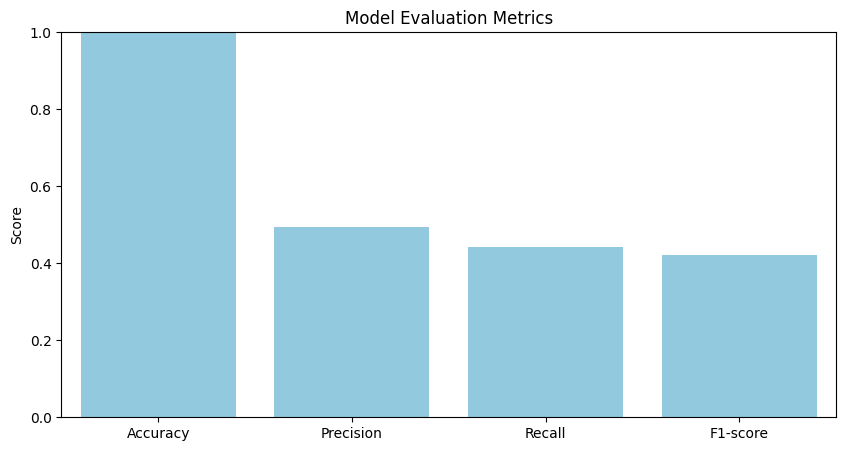

In [15]:
# @title Model Evaluation Metrics K-Nearest Neighbors (KNN)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
# Konversi ke persentase
rounded_accuracy = round(accuracy * 100)
# Menghitung presisi model dengan menangani zero division
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
# Menghitung recall model dengan menangani zero division
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
# Menghitung F1-score model
f1 = f1_score(y_test, y_pred, average='macro')

# Evaluasi model untuk TF-IDF Vectorizer
print("\nEvaluation for TF-IDF Vectorizer:")
print(classification_report(y_test, y_pred))

# Menampilkan persentase akurasi
print(f"Accuracy: {rounded_accuracy}%")

# Visualisasi akurasi, presisi, recall, dan f1-score
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
values = [rounded_accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, color="skyblue")
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  # Memastikan sumbu y berada dalam rentang 0-1 untuk nilai persentase
plt.show()

Accuracy (Confusion Matrix): 45.31%


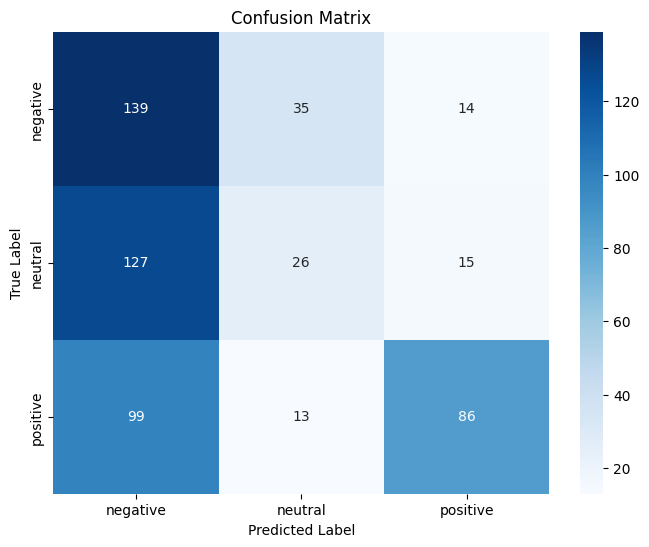

In [16]:
# @title Model Confusion Matrix K-Nearest Neighbors (KNN)

# Menghitung akurasi dari confusion matrix
total_samples = np.sum(cm)
correct_predictions = np.trace(cm)
accuracy_from_cm = correct_predictions / total_samples

# Menghitung akurasi dari confusion matrix dalam persentase
accuracy_from_cm_percent = accuracy_from_cm * 100

# Menampilkan akurasi dari confusion matrix
print(f"Accuracy (Confusion Matrix): {accuracy_from_cm_percent:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=tfidf_classifier.classes_, yticklabels=tfidf_classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
# @title Model Naive Bayes Multinomial (NBC) TfidfVectorizer

# Inisialisasi model Naive Bayes Multinomial untuk TF-IDF Vectorizer
tfidf_classifier = MultinomialNB()

# Melatih model menggunakan data latih untuk TF-IDF Vectorizer
tfidf_classifier.fit(X_tfidf_train, y_train)

# Lakukan prediksi menggunakan data uji untuk TF-IDF Vectorizer
y_tfidf_pred = tfidf_classifier.predict(X_tfidf_test)

# Menghitung matriks (confusion matrix)
cm = confusion_matrix(y_test, y_tfidf_pred)


Evaluation for TF-IDF Vectorizer:
              precision    recall  f1-score   support

    negative       0.64      0.60      0.62       188
     neutral       0.46      0.33      0.38       168
    positive       0.63      0.83      0.72       198

    accuracy                           0.60       554
   macro avg       0.58      0.59      0.57       554
weighted avg       0.58      0.60      0.58       554

Accuracy: 60%


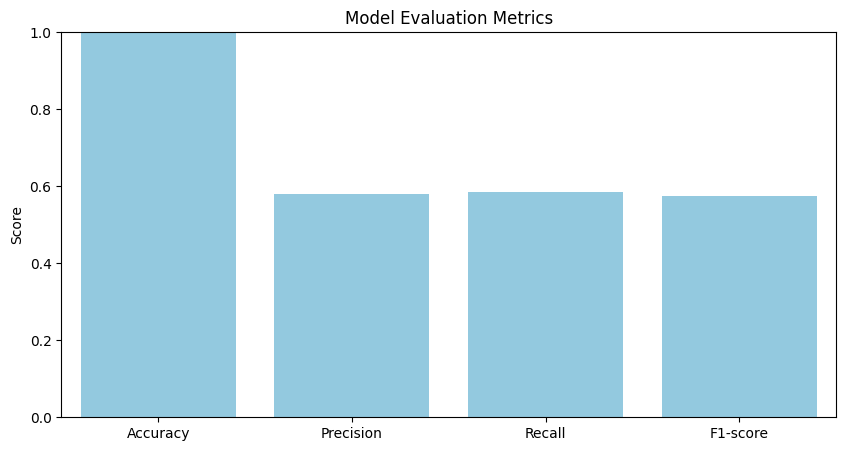

In [18]:
# @title Model Evaluation Metrics Naive Bayes Multinomial (NBC)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_tfidf_pred)
# Konversi ke persentase
rounded_accuracy = round(accuracy * 100)
# Menghitung presisi model dengan menangani zero division
precision = precision_score(y_test, y_tfidf_pred, average='macro', zero_division=0)
# Menghitung recall model dengan menangani zero division
recall = recall_score(y_test, y_tfidf_pred, average='macro', zero_division=0)
# Menghitung F1-score model
f1 = f1_score(y_test, y_tfidf_pred, average='macro')

# Evaluasi model untuk TF-IDF Vectorizer
print("\nEvaluation for TF-IDF Vectorizer:")
print(classification_report(y_test, y_tfidf_pred))

# Menampilkan persentase akurasi
print(f"Accuracy: {rounded_accuracy}%")

# Visualisasi akurasi, presisi, recall, dan f1-score
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
values = [rounded_accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
sns.barplot(x=metrics, y=values, color="skyblue")
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)  # Memastikan sumbu y berada dalam rentang 0-1 untuk nilai persentase
plt.show()

Accuracy (Confusion Matrix): 59.93%


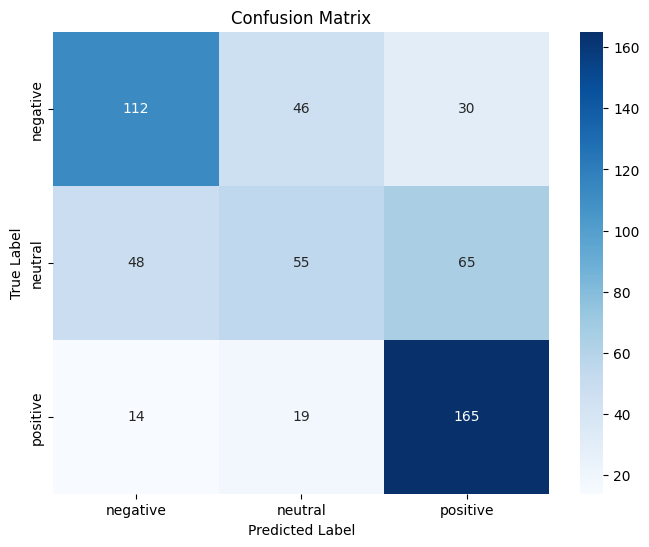

In [19]:
# @title Model Confusion Matrix  Naive Bayes Multinomial (NBC)

# Menghitung akurasi dari confusion matrix
total_samples = np.sum(cm)
correct_predictions = np.trace(cm)
accuracy_from_cm = correct_predictions / total_samples

# Menghitung akurasi dari confusion matrix dalam persentase
accuracy_from_cm_percent = accuracy_from_cm * 100

# Menampilkan akurasi dari confusion matrix
print(f"Accuracy (Confusion Matrix): {accuracy_from_cm_percent:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=tfidf_classifier.classes_, yticklabels=tfidf_classifier.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# @title Model K-Fold Cross Validation 10-Fold K-NN & NBC

# Inisialisasi model KNN dengan jumlah tetangga (k) = 3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Inisialisasi model NBC
nb_classifier = MultinomialNB()

# Inisialisasi K-Fold Cross Validation dengan 10-Fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Melakukan K-Fold Cross Validation untuk KNN
cv_results_knn = cross_val_score(knn_classifier, X_tfidf, dataset['Sentiment'], cv=kfold, scoring='accuracy')

# Melakukan K-Fold Cross Validation untuk NBC
cv_results_nb = cross_val_score(nb_classifier, X_tfidf, dataset['Sentiment'], cv=kfold, scoring='accuracy')

KNN Accuracy: 47.72% (+/- 0.08%)
NBC Accuracy: 60.30% (+/- 0.04%)


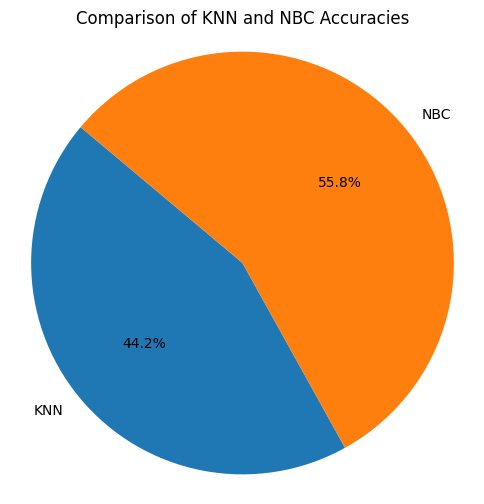

In [21]:
# @title  Perbandingan Accuracy Model K-Fold Cross Validation

# Rata-rata dan simpangan baku untuk KNN
knn_mean_accuracy = cv_results_knn.mean() * 100
knn_std_accuracy = cv_results_knn.std() * 2

# Rata-rata dan simpangan baku untuk NBC
nb_mean_accuracy = cv_results_nb.mean() * 100
nb_std_accuracy = cv_results_nb.std() * 2

# Menampilkan hasil cross-validation untuk KNN dan NBC
print("KNN Accuracy: %.2f%% (+/- %.2f%%)" % (knn_mean_accuracy, knn_std_accuracy))
print("NBC Accuracy: %.2f%% (+/- %.2f%%)" % (nb_mean_accuracy, nb_std_accuracy))

# Data untuk diagram lingkaran
data = [knn_mean_accuracy, nb_mean_accuracy]

# Label untuk setiap bagian diagram lingkaran
labels = ['KNN', 'NBC']

# Warna untuk setiap bagian diagram lingkaran
colors = ['#1f77b4', '#ff7f0e']

# Membuat diagram lingkaran
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")  # Menentukan palet warna
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Comparison of KNN and NBC Accuracies')  # Judul diagram
plt.axis('equal')  # Memastikan diagram lingkaran berbentuk lingkaran
plt.show()

In [22]:
# @title Word Cloud

# memisahkan dataset berdasarkan sentimen
positive_comments = dataset.loc[dataset['Sentiment'] == 'positive', 'Comments(Cleaning)'].str.cat(sep=' ')
neutral_comments = dataset.loc[dataset['Sentiment'] == 'neutral', 'Comments(Cleaning)'].str.cat(sep=' ')
negative_comments = dataset.loc[dataset['Sentiment'] == 'negative', 'Comments(Cleaning)'].str.cat(sep=' ')

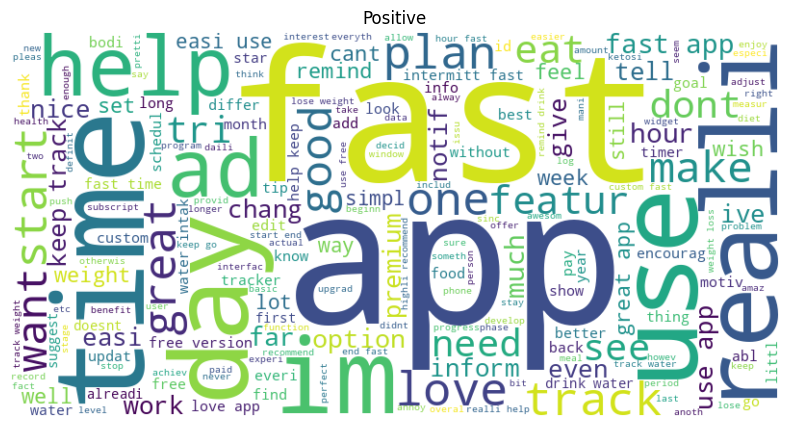

In [23]:
# @title Word Cloud (Positive)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive')
plt.show()

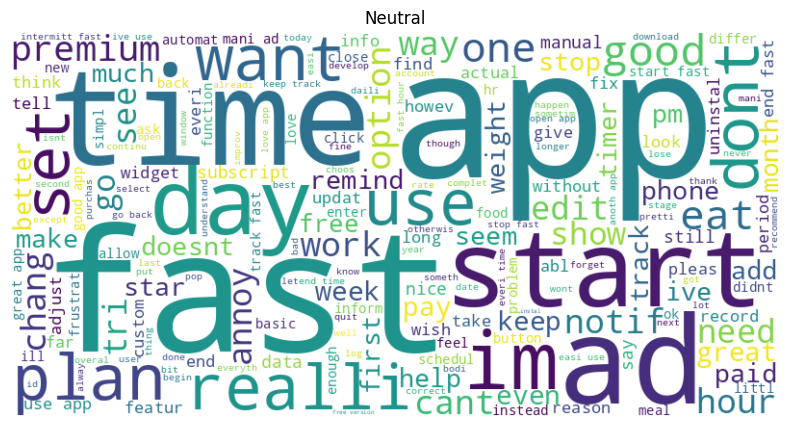

In [24]:
# @title Word Cloud (Neutral)

wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral')
plt.show()

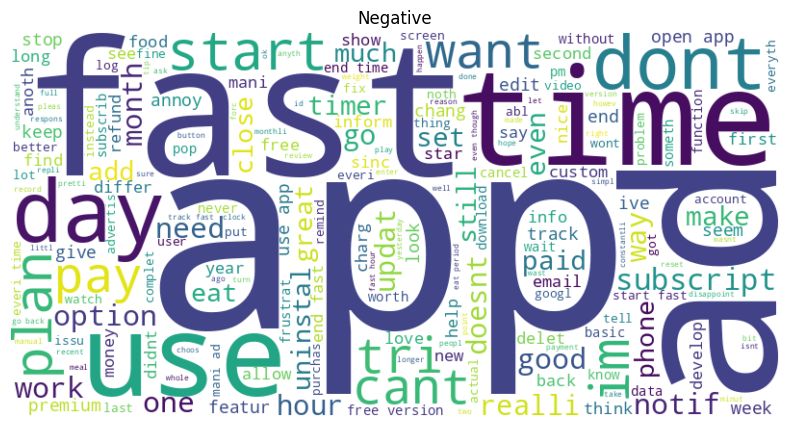

In [25]:
# @title Word Cloud (Negative)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative')
plt.show()

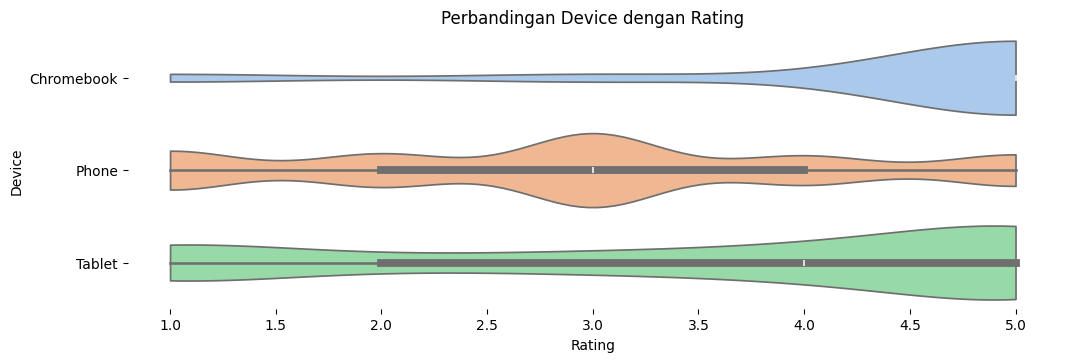

In [26]:
# @title Perbandingan Device dengan Rating

# Variabel figsize digunakan untuk menentukan ukuran figur (lebar, tinggi) dalam satuan inch.
figsize = (12, 1.2 * len(dataset['Device'].unique()))

# Membuat sebuah figur dengan ukuran yang telah ditentukan sebelumnya menggunakan plt.figure()
plt.figure(figsize=figsize)

# Menggambar plot jenis violin
sns.violinplot(data=dataset, x='Rating', y='Device', inner='box', hue='Device', legend=False, cut=0)

# Menghapus batas atas, kanan, bawah, dan kiri dari sumbu plot
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Perbandingan Device dengan Rating')
plt.show()